In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'

import matplotlib
matplotlib.rcParams['text.usetex'] = True
plt.rc('font', family='serif', serif=['Times'])

import warnings; warnings.simplefilter('ignore')

In [3]:
def shuffle(df, n=1, axis=0):     
    df = df.copy()
    for _ in range(n):
        df.apply(np.random.shuffle, axis=axis)
    return df

In [4]:
METHOD = 'spearman' # pearson

## Overall

In [5]:
res_str = """
albefb         & 87.6 & 69.1 & 57.3 & 29.2 & 15.5 & 11.0
albefl         & 88.6 & 69.4 & 58.3 & 32.5 & 16.2 & 12.7
blipl          & 48.7 & 67.8 & 49.7 & 36.5 & 18.5 & 14.5
blipxl         & 51.4 & 68.8 & 46.9 & 35.5 & 15.0 & 11.7
blipxlfilt     & 51.2 & 68.2 & 48.7 & 34.7 & 15.2 & 12.2
blipvitxl      & 50.8 & 70.3 & 50.3 & 34.7 & 14.5 & 12.2
pevlpre        & 86.2 & 68.9 & 57.5 & 33.2 & 15.7 & 12.2
pevlgrd        & 88.5 & 69.5 & 57.7 & 36.2 & 15.0 & 12.0
pevlvrd        & 84.8 & 64.5 & 59.5 & 31.2 & 12.0 & 7.5
xvlmb          & 88.9 & 72.4 & 63.0 & 44.0 & 26.7 & 21.5
xvlml          & 90.0 & 74.5 & 64.3 & 46.7 & 24.5 & 21.2
"""

In [6]:
model2vals = dict()
for l in res_str.splitlines():
    vals = l.replace('&', '').split()
    if l:
        model2vals[vals[0]] = [float(v) for v in vals[1:]]
df = pd.DataFrame(model2vals).transpose()
df.columns = ['SVO\nAvg.', 'VALSE\nAvg.', 'VSR\nTest Avg.', 'Wino\nText', 'Wino\nImage', 'Wino\nGroup']
df

,SVO\nAvg.,VALSE\nAvg.,VSR\nTest Avg.,Wino\nText,Wino\nImage,Wino\nGroup
albefb,87.6,69.1,57.3,29.2,15.5,11.0
albefl,88.6,69.4,58.3,32.5,16.2,12.7
blipl,48.7,67.8,49.7,36.5,18.5,14.5
blipxl,51.4,68.8,46.9,35.5,15.0,11.7
blipxlfilt,51.2,68.2,48.7,34.7,15.2,12.2
blipvitxl,50.8,70.3,50.3,34.7,14.5,12.2
pevlpre,86.2,68.9,57.5,33.2,15.7,12.2
pevlgrd,88.5,69.5,57.7,36.2,15.0,12.0
pevlvrd,84.8,64.5,59.5,31.2,12.0,7.5
xvlmb,88.9,72.4,63.0,44.0,26.7,21.5


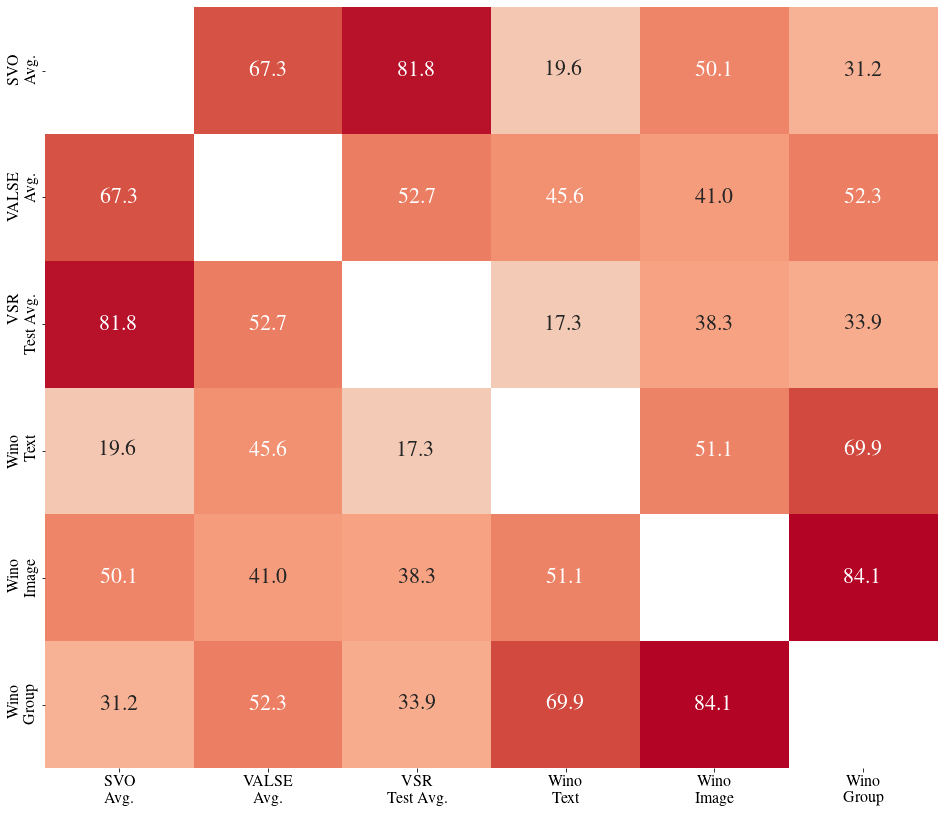

In [7]:
# Overall
plot_cols = list(df.columns)

corr_matrix = df.corr(method=METHOD)
corr_mat = corr_matrix.to_numpy()
di = np.diag_indices(len(corr_mat))
corr_mat[di] = None

f, ax = plt.subplots(figsize=(16,14))
sns.heatmap(corr_mat*100, annot=True, annot_kws={'fontsize': 22}, ax=ax, center=0.0, 
            cmap=sns.color_palette("coolwarm", as_cmap=True), cbar=False, fmt='.1f')
ax.set_xticklabels(plot_cols, fontdict={'fontsize': 16});
ax.set_yticklabels(plot_cols, fontdict={'fontsize': 16});

f.savefig('spearmanr_corr_benchmarks.pdf', bbox_anchor="tight")

In [8]:
rand_dfs = [shuffle(df) for _ in range(100)];
rand_dfs[0]

,SVO\nAvg.,VALSE\nAvg.,VSR\nTest Avg.,Wino\nText,Wino\nImage,Wino\nGroup
albefb,51.4,70.3,46.9,34.7,12.0,21.2
albefl,51.2,69.5,49.7,32.5,18.5,11.7
blipl,84.8,68.9,48.7,46.7,15.7,12.0
blipxl,88.5,74.5,57.7,36.5,14.5,12.2
blipxlfilt,50.8,67.8,63.0,31.2,15.0,11.0
blipvitxl,90.0,72.4,57.5,29.2,15.5,12.2
pevlpre,86.2,69.4,57.3,36.2,16.2,21.5
pevlgrd,87.6,68.2,50.3,33.2,15.0,12.2
pevlvrd,88.6,68.8,58.3,34.7,15.2,12.7
xvlmb,48.7,64.5,64.3,44.0,24.5,7.5


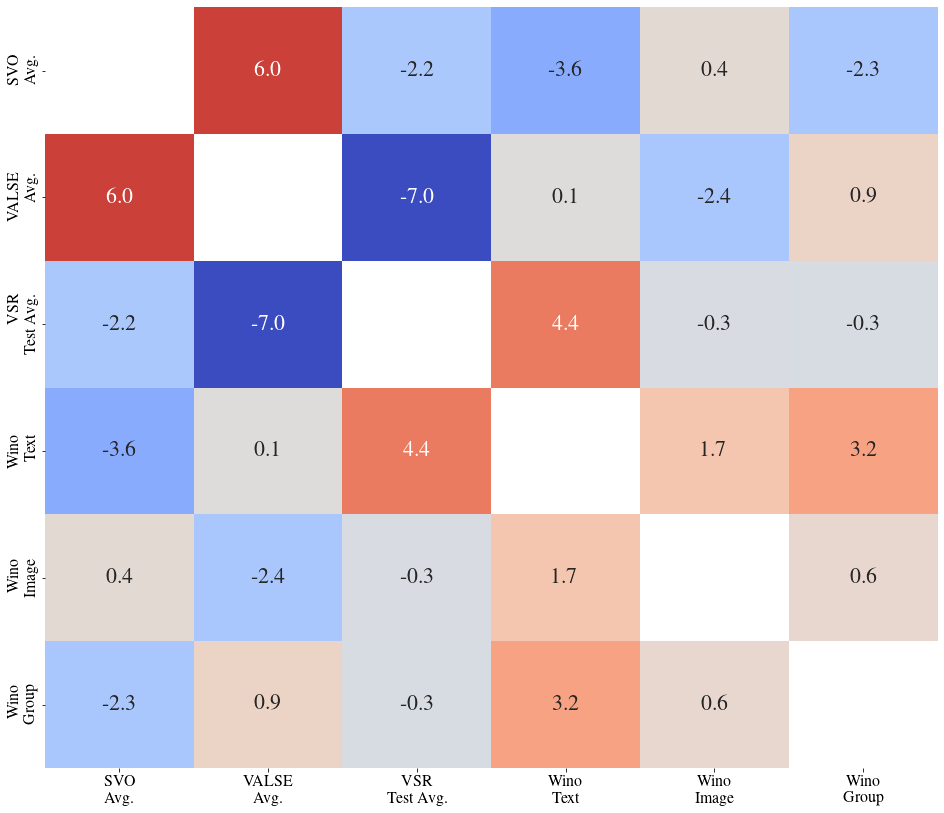

In [10]:
# Overall (random)
plot_cols = list(df.columns)

num_rands = 100
corr_mats = []
for ix in range(num_rands):
    corr_matrix = rand_dfs[ix].corr(method=METHOD)
    corr_mats.append(corr_matrix.to_numpy())

corr_mat = np.stack(corr_mats).mean(axis=0, dtype=float)
di = np.diag_indices(len(corr_mat))
corr_mat[di] = None

f, ax = plt.subplots(figsize=(16,14))
sns.heatmap(corr_mat*100, annot=True, annot_kws={'fontsize': 22}, ax=ax, center=0.0, 
            cmap=sns.color_palette("coolwarm", as_cmap=True), cbar=False, fmt='.1f')
ax.set_xticklabels(plot_cols, fontdict={'fontsize': 16});
ax.set_yticklabels(plot_cols, fontdict={'fontsize': 16});

## Subtasks

### Load data

In [11]:
df_wino = df.iloc[:, -3:]
df_wino

,Wino\nText,Wino\nImage,Wino\nGroup
albefb,29.2,15.5,11.0
albefl,32.5,16.2,12.7
blipl,36.5,18.5,14.5
blipxl,35.5,15.0,11.7
blipxlfilt,34.7,15.2,12.2
blipvitxl,34.7,14.5,12.2
pevlpre,33.2,15.7,12.2
pevlgrd,36.2,15.0,12.0
pevlvrd,31.2,12.0,7.5
xvlmb,44.0,26.7,21.5


In [12]:
valse_str = """
albefb 256 & 71.3 & 78.8 & 62.2 & 65.1 & 59.8 & 73.1 & 73.6 & 58.4 & 52.4 & 55.8 & 95.5 & 69.1
albefl 256 & 69.5 & 76.0 & 61.5 & 61.0 & 64.5 & 70.7 & 77.6 & 60.5 & 55.9 & 61.5 & 96.1 & 69.4
blipl 224 & 82.4 & 73.8 & 61.8 & 62.6 & 63.7 & 65.2 & 74.7 & 55.2 & 52.3 & 42.3 & 92.3 & 67.8 
blipxl 224 & 78.2 & 75.9 & 63.4 & 63.4 & 58.5 & 66.2 & 75.2 & 59.0 & 56.4 & 52.9 & 93.2 & 68.8 
blipxlfilt 224 & 75.4 & 75.0 & 64.7 & 68.8 & 53.0 & 66.7 & 73.0 & 60.6 & 48.2 & 51.0 & 93.8 & 68.2
blipvitxl 224 & 73.3 & 77.7 & 68.2 & 67.6 & 61.2 & 71.8 & 75.3 & 60.8 & 51.1 & 45.2 & 96.1 & 70.3 
pevlpre 256 & 89.7 & 65.5 & 66.0 & 66.2 & 57.3 & 67.9 & 73.5 & 59.4 & 58.2 & 56.7 & 90.9 & 68.9 
pevlgrd 512 & 91.1 & 63.9 & 70.0 & 70.9 & 63.2 & 62.4 & 74.4 & 57.1 & 53.8 & 49.0 & 92.6 & 69.5
pevlvrd 512 & 83.8 & 61.8 & 62.8 & 70.3 & 40.4 & 64.5 & 68.1 & 53.2 & 47.7 & 42.3 & 94.1 & 64.5 
xvlmb 224 & 80.0 & 77.8 & 69.0 & 68.4 & 72.5 & 74.8 & 77.3 & 65.0 & 50.1 & 48.1 & 92.5 & 72.4 
xvlml 224 & 83.6 & 78.7 & 71.5 & 72.0 & 74.8 & 73.1 & 79.2 & 64.6 & 60.0 & 49.0 & 91.9 & 74.5
"""

model2vals = dict()
for l in valse_str.splitlines():
    vals = l.replace('&', '').split()
    if l:
        model2vals[vals[0]] = [float(v) for v in vals[1:]]
df_valse = pd.DataFrame(model2vals).transpose()
df_valse.drop(0, axis=1, inplace=True)
df_valse.columns = [s.replace('_', '\n') for s in ['VALSE_Existence_quantifiers', 'VALSE_Plurality_number', 
                    'VALSE_Counting_balanced', 'VALSE_Counting_sns.', 'VALSE_Counting_adv.',
                    'VALSE_Sp.rel._relations', 'VALSE_Action_repl.', 'VALSE_Action_actantswap.',
                    'VALSE_Coreference_standard', 'VALSE_Coreference_clean',
                    'VALSE_Foil-it!', 'VALSE_Avg.']]
df_valse

,VALSE\nExistence\nquantifiers,VALSE\nPlurality\nnumber,VALSE\nCounting\nbalanced,VALSE\nCounting\nsns.,VALSE\nCounting\nadv.,VALSE\nSp.rel.\nrelations,VALSE\nAction\nrepl.,VALSE\nAction\nactantswap.,VALSE\nCoreference\nstandard,VALSE\nCoreference\nclean,VALSE\nFoil-it!,VALSE\nAvg.
albefb,71.3,78.8,62.2,65.1,59.8,73.1,73.6,58.4,52.4,55.8,95.5,69.1
albefl,69.5,76.0,61.5,61.0,64.5,70.7,77.6,60.5,55.9,61.5,96.1,69.4
blipl,82.4,73.8,61.8,62.6,63.7,65.2,74.7,55.2,52.3,42.3,92.3,67.8
blipxl,78.2,75.9,63.4,63.4,58.5,66.2,75.2,59.0,56.4,52.9,93.2,68.8
blipxlfilt,75.4,75.0,64.7,68.8,53.0,66.7,73.0,60.6,48.2,51.0,93.8,68.2
blipvitxl,73.3,77.7,68.2,67.6,61.2,71.8,75.3,60.8,51.1,45.2,96.1,70.3
pevlpre,89.7,65.5,66.0,66.2,57.3,67.9,73.5,59.4,58.2,56.7,90.9,68.9
pevlgrd,91.1,63.9,70.0,70.9,63.2,62.4,74.4,57.1,53.8,49.0,92.6,69.5
pevlvrd,83.8,61.8,62.8,70.3,40.4,64.5,68.1,53.2,47.7,42.3,94.1,64.5
xvlmb,80.0,77.8,69.0,68.4,72.5,74.8,77.3,65.0,50.1,48.1,92.5,72.4


In [13]:
svo_str = """
albefb         & 88.5 & 85.4 & 93.7 & 87.6 
albefl         & 89.4 & 86.4 & 94.7 & 88.6 
blipl          & 49.8 & 48.8 & 47.5 & 48.7 
blipxl         & 50.8 & 51.4 & 51.8 & 51.4 
blipxlfilt     & 49.4 & 51.3 & 52.5 & 51.2 
blipvitxl      & 50.0 & 50.9 & 50.9 & 50.8 
pevlpre        & 89.4 & 82.9 & 93.9 & 86.2 
pevlgrd        & 91.2 & 85.9 & 94.6 & 88.5 
pevlvrd        & 90.1 & 81.1 & 92.3 & 84.8 
xvlmb          & 89.3 & 87.1 & 94.5 & 88.9 
xvlml          & 90.3 & 88.4 & 94.6 & 90.0 
"""

model2vals = dict()
for l in svo_str.splitlines():
    vals = l.replace('&', '').split()
    if l:
        model2vals[vals[0]] = [float(v) for v in vals[1:]]
df_svo = pd.DataFrame(model2vals).transpose()
df_svo.columns = ['SVO\nSubj.', 'SVO\nVerb', 'SVO\nObj.', 'SVO\nAvg.']
df_svo

,SVO\nSubj.,SVO\nVerb,SVO\nObj.,SVO\nAvg.
albefb,88.5,85.4,93.7,87.6
albefl,89.4,86.4,94.7,88.6
blipl,49.8,48.8,47.5,48.7
blipxl,50.8,51.4,51.8,51.4
blipxlfilt,49.4,51.3,52.5,51.2
blipvitxl,50.0,50.9,50.9,50.8
pevlpre,89.4,82.9,93.9,86.2
pevlgrd,91.2,85.9,94.6,88.5
pevlvrd,90.1,81.1,92.3,84.8
xvlmb,89.3,87.1,94.5,88.9


In [14]:
vsr_dev_str = """
albefb         & 52.3 & 38.6 & 55.9 & 61.7 & 56.2 & 58.6 & 65.6 & 58.0
albefl         & 52.3 & 59.1 & 55.9 & 59.8 & 46.9 & 66.8 & 71.9 & 60.2
blipl          & 56.8 & 56.8 & 57.6 & 42.5 & 51.6 & 45.1 & 50.0 & 47.4
blipxl         & 44.7 & 43.2 & 52.5 & 53.6 & 53.1 & 50.2 & 40.6 & 50.5
blipxlfilt     & 57.6 & 36.4 & 47.5 & 45.9 & 48.4 & 48.5 & 37.5 & 47.7
blipvitxl      & 56.1 & 29.5 & 49.2 & 46.9 & 53.1 & 49.8 & 46.9 & 48.7
pevlpre        & 47.0 & 56.8 & 57.6 & 61.9 & 51.6 & 62.4 & 71.9 & 59.3
pevlgrd        & 53.8 & 65.9 & 59.3 & 60.9 & 60.9 & 62.7 & 75.0 & 61.1
pevlvrd        & 54.5 & 59.1 & 61.0 & 59.8 & 59.4 & 64.1 & 68.8 & 60.7
xvlmb          & 57.6 & 56.8 & 59.3 & 69.2 & 57.8 & 71.2 & 75.0 & 66.6
xvlml          & 61.4 & 65.9 & 64.4 & 68.4 & 62.5 & 70.5 & 84.4 & 67.9
"""

model2vals = dict()
for l in vsr_dev_str.splitlines():
    vals = l.replace('&', '').split()
    if l:
        model2vals[vals[0]] = [float(v) for v in vals[1:]]
df_vsr_dev = pd.DataFrame(model2vals).transpose()
df_vsr_dev.columns = [s.replace('_', '\n') for s in ['VSR_dev_Adjacency', 'VSR_dev_Directional', 'VSR_dev_Orientation', 
                      'VSR_dev_Projective', 'VSR_dev_Proximity', 'VSR_dev_Topological', 'VSR_dev_Unallocated', 'VSR_dev_Overall']]
df_vsr_dev

,VSR\ndev\nAdjacency,VSR\ndev\nDirectional,VSR\ndev\nOrientation,VSR\ndev\nProjective,VSR\ndev\nProximity,VSR\ndev\nTopological,VSR\ndev\nUnallocated,VSR\ndev\nOverall
albefb,52.3,38.6,55.9,61.7,56.2,58.6,65.6,58.0
albefl,52.3,59.1,55.9,59.8,46.9,66.8,71.9,60.2
blipl,56.8,56.8,57.6,42.5,51.6,45.1,50.0,47.4
blipxl,44.7,43.2,52.5,53.6,53.1,50.2,40.6,50.5
blipxlfilt,57.6,36.4,47.5,45.9,48.4,48.5,37.5,47.7
blipvitxl,56.1,29.5,49.2,46.9,53.1,49.8,46.9,48.7
pevlpre,47.0,56.8,57.6,61.9,51.6,62.4,71.9,59.3
pevlgrd,53.8,65.9,59.3,60.9,60.9,62.7,75.0,61.1
pevlvrd,54.5,59.1,61.0,59.8,59.4,64.1,68.8,60.7
xvlmb,57.6,56.8,59.3,69.2,57.8,71.2,75.0,66.6


In [19]:
vsr_test_str = """
albefb         & 51.1 & 42.2 & 58.0 & 60.2 & 55.3 & 59.2 & 56.9 & 57.3
albefl         & 54.2 & 40.0 & 58.0 & 62.6 & 52.0 & 58.9 & 58.8 & 58.3
blipl          & 49.3 & 50.0 & 47.3 & 49.3 & 48.0 & 51.8 & 41.2 & 49.7
blipxl         & 41.2 & 52.2 & 53.6 & 45.4 & 49.6 & 49.7 & 37.3 & 46.9
blipxlfilt     & 49.3 & 57.8 & 53.6 & 45.5 & 47.2 & 51.1 & 41.2 & 48.7
blipvitxl      & 51.8 & 58.9 & 52.7 & 48.5 & 43.9 & 51.8 & 47.1 & 50.3
pevlpre        & 55.3 & 48.9 & 56.2 & 60.8 & 48.8 & 57.4 & 58.8 & 57.5
pevlgrd        & 53.5 & 50.0 & 52.7 & 59.4 & 54.5 & 60.2 & 58.8 & 57.7
pevlvrd        & 55.6 & 52.2 & 53.6 & 60.4 & 54.5 & 63.1 & 64.7 & 59.5
xvlmb          & 57.7 & 43.3 & 52.7 & 66.1 & 54.5 & 68.4 & 62.7 & 63.0
xvlml          & 58.5 & 46.7 & 58.0 & 67.7 & 52.0 & 68.7 & 68.6 & 64.3
"""

model2vals = dict()
for l in vsr_test_str.splitlines():
    vals = l.replace('&', '').split()
    if l:
        model2vals[vals[0]] = [float(v) for v in vals[1:]]
df_vsr_test = pd.DataFrame(model2vals).transpose()
df_vsr_test.columns = [s.replace('_', '\n') for s in ['VSR_dev_Adjacency', 'VSR_dev_Directional', 'VSR_dev_Orientation', 
                      'VSR_dev_Projective', 'VSR_dev_Proximity', 'VSR_dev_Topological', 'VSR_dev_Unallocated', 'VSR_dev_Overall']]
df_vsr_test

,VSR\ndev\nAdjacency,VSR\ndev\nDirectional,VSR\ndev\nOrientation,VSR\ndev\nProjective,VSR\ndev\nProximity,VSR\ndev\nTopological,VSR\ndev\nUnallocated,VSR\ndev\nOverall
albefb,51.1,42.2,58.0,60.2,55.3,59.2,56.9,57.3
albefl,54.2,40.0,58.0,62.6,52.0,58.9,58.8,58.3
blipl,49.3,50.0,47.3,49.3,48.0,51.8,41.2,49.7
blipxl,41.2,52.2,53.6,45.4,49.6,49.7,37.3,46.9
blipxlfilt,49.3,57.8,53.6,45.5,47.2,51.1,41.2,48.7
blipvitxl,51.8,58.9,52.7,48.5,43.9,51.8,47.1,50.3
pevlpre,55.3,48.9,56.2,60.8,48.8,57.4,58.8,57.5
pevlgrd,53.5,50.0,52.7,59.4,54.5,60.2,58.8,57.7
pevlvrd,55.6,52.2,53.6,60.4,54.5,63.1,64.7,59.5
xvlmb,57.7,43.3,52.7,66.1,54.5,68.4,62.7,63.0


### Correlations

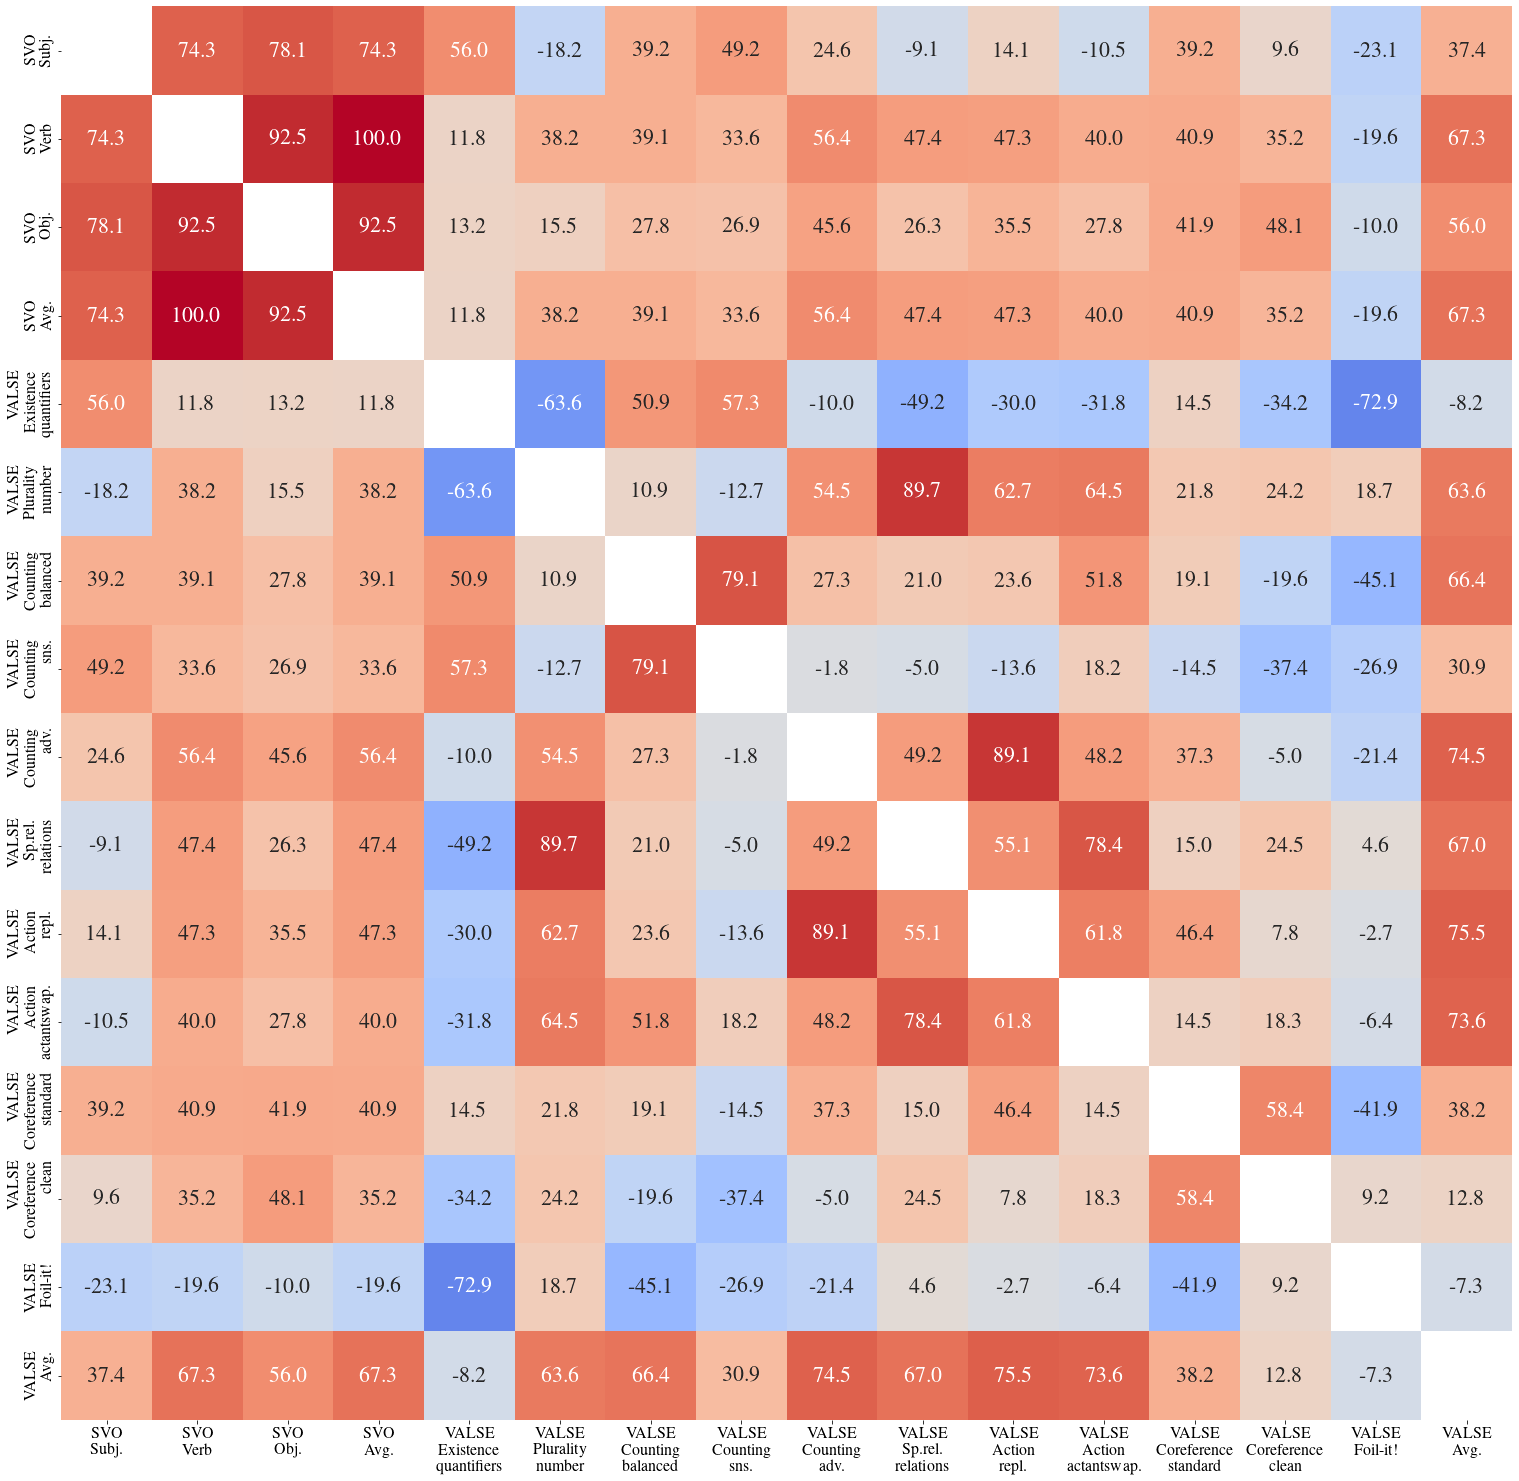

In [16]:
# SVO-VALSE
this_merge_df = pd.concat([df_svo, df_valse], axis=1)
corr_matrix = this_merge_df.corr(method=METHOD)
corr_mat = corr_matrix.to_numpy()
di = np.diag_indices(len(corr_mat))
corr_mat[di] = None

f, ax = plt.subplots(figsize=(26,26))
sns.heatmap(corr_mat*100, annot=True, annot_kws={'fontsize': 22}, ax=ax, center=0.0, 
            cmap=sns.color_palette("coolwarm", as_cmap=True), cbar=False, fmt='.1f')
plot_cols = list(this_merge_df.columns)
ax.set_xticklabels(plot_cols, fontdict={'fontsize': 16});
ax.set_yticklabels(plot_cols, fontdict={'fontsize': 16});


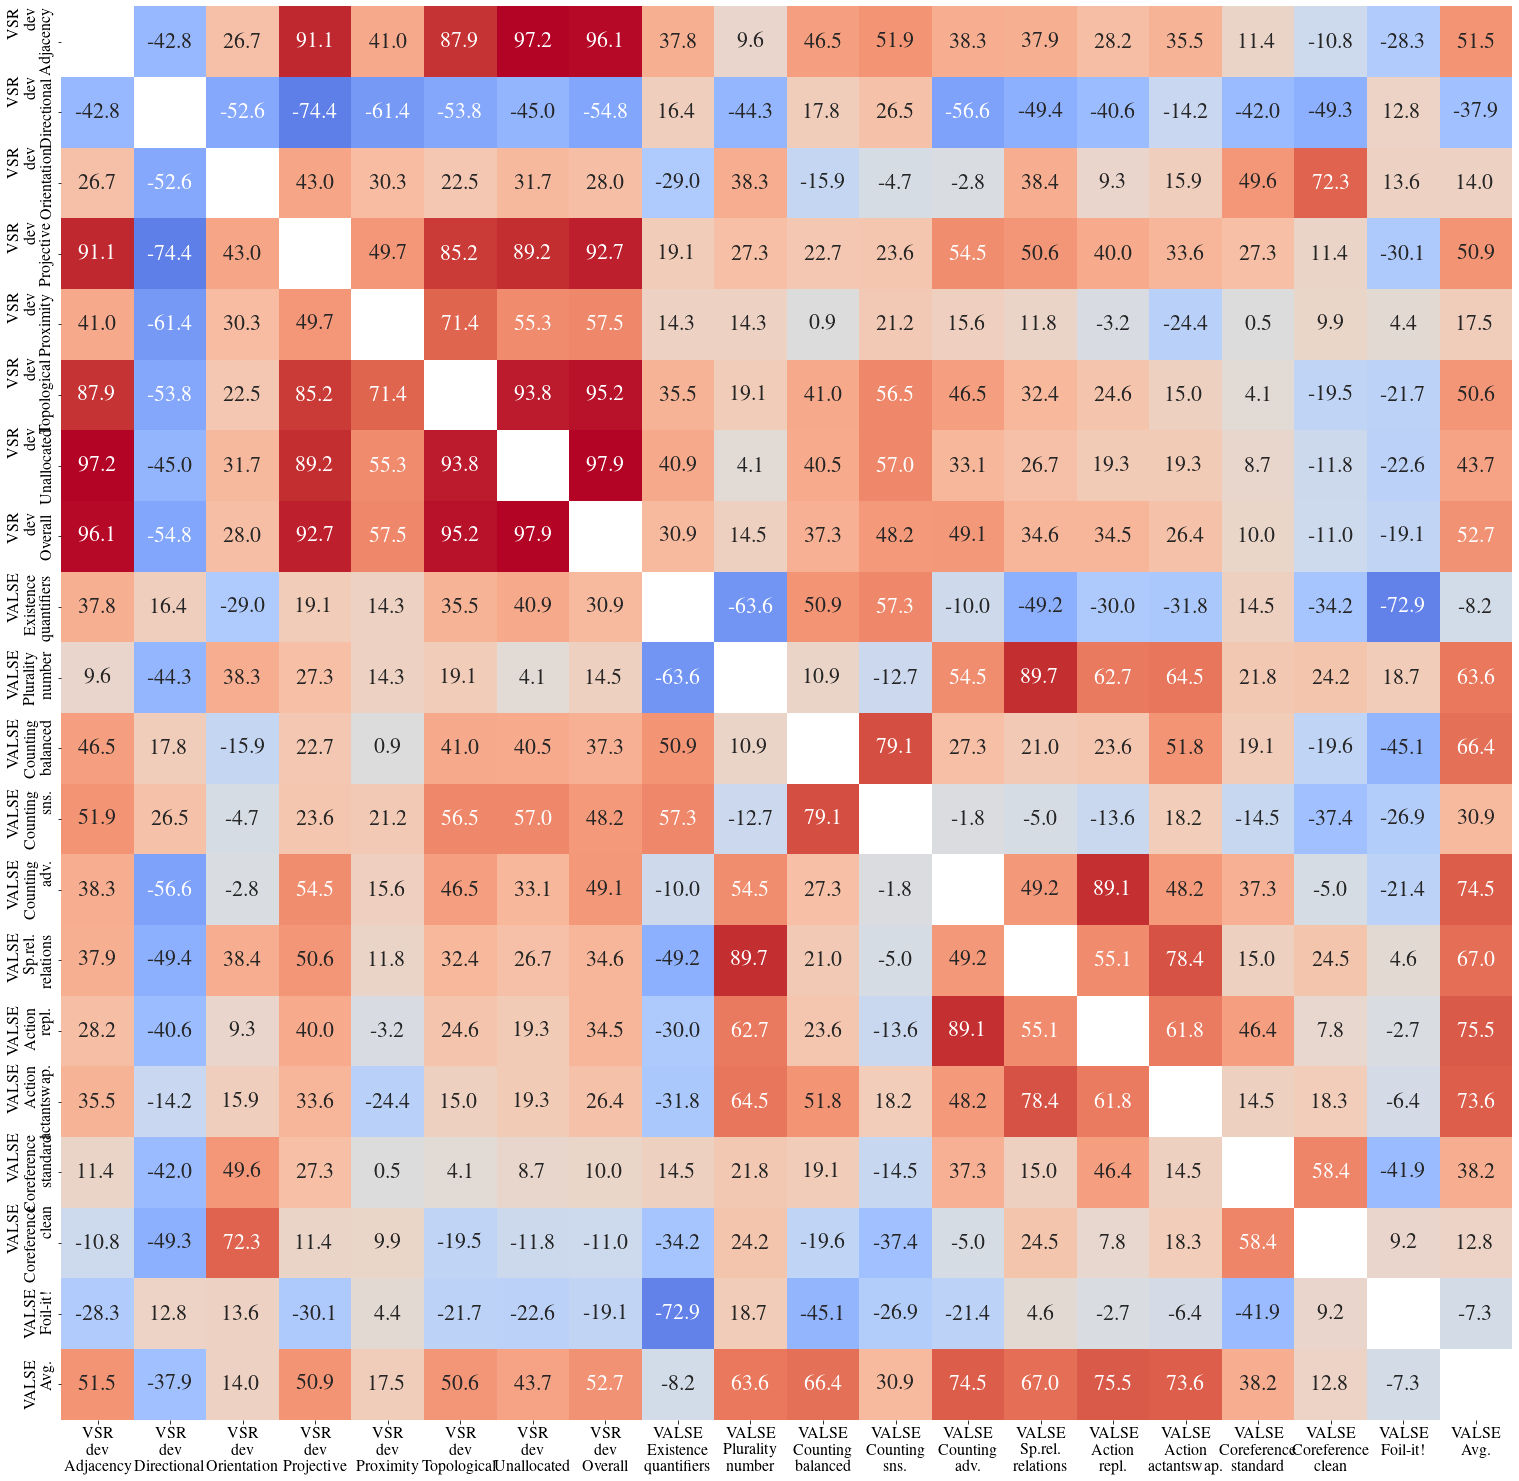

In [20]:
# VSR-VALSE
this_merge_df = pd.concat([df_vsr_test, df_valse], axis=1)
corr_matrix = this_merge_df.corr(method=METHOD)
corr_mat = corr_matrix.to_numpy()
di = np.diag_indices(len(corr_mat))
corr_mat[di] = None

f, ax = plt.subplots(figsize=(26,26))
sns.heatmap(corr_mat*100, annot=True, annot_kws={'fontsize': 22}, ax=ax, center=0.0, 
            cmap=sns.color_palette("coolwarm", as_cmap=True), cbar=False, fmt='.1f')
plot_cols = list(this_merge_df.columns)
ax.set_xticklabels(plot_cols, fontdict={'fontsize': 16});
ax.set_yticklabels(plot_cols, fontdict={'fontsize': 16});


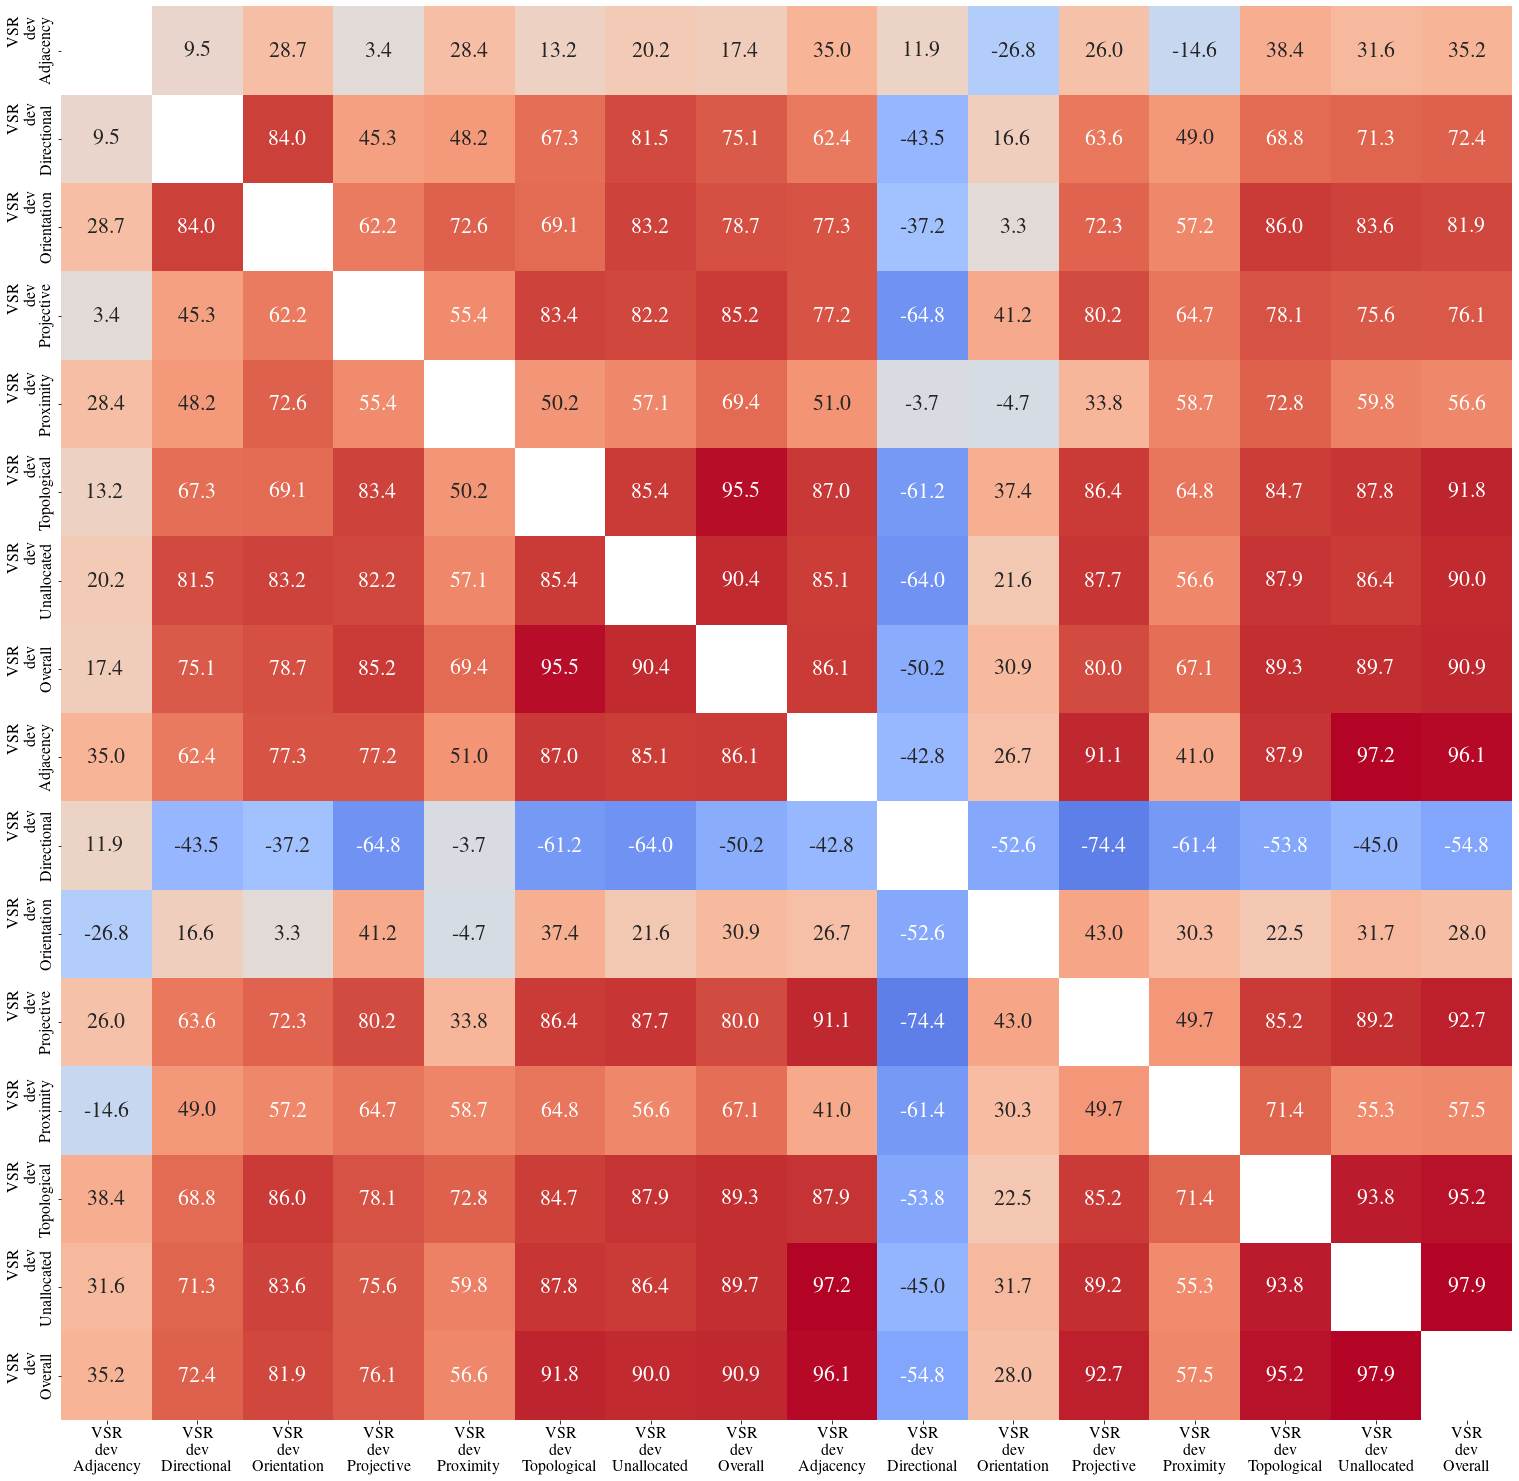

In [21]:
# VSRs
this_merge_df = pd.concat([df_vsr_dev, df_vsr_test], axis=1)
corr_matrix = this_merge_df.corr(method=METHOD)
corr_mat = corr_matrix.to_numpy()
di = np.diag_indices(len(corr_mat))
corr_mat[di] = None

f, ax = plt.subplots(figsize=(26,26))
sns.heatmap(corr_mat*100, annot=True, annot_kws={'fontsize': 22}, ax=ax, center=0.0, 
            cmap=sns.color_palette("coolwarm", as_cmap=True), cbar=False, fmt='.1f')
plot_cols = list(this_merge_df.columns)
ax.set_xticklabels(plot_cols, fontdict={'fontsize': 16});
ax.set_yticklabels(plot_cols, fontdict={'fontsize': 16});
